In [1]:
#Import libraries
import re
import string
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_palette("pastel")
import matplotlib.pyplot as plt

In [2]:
jobdata = pd.read_csv('fake_job_postings.csv')

### Correlation matrix

The correlation matrix visualises the relationship between the numeric data. The map below does not exhibit any strong positive or negative correlations between the numeric variables.

However, a moderate negative correlation can be observed between the 'fraudulent' variable and the 'has_company_logo' and 'has_questions' variables. When the posting doesn't require interviews or doesn't have a company logo, it is more likely to be fraudulent. 

There is also a mild positive correlation between the 'has_questions' and 'has_company_logo' variables, suggesting that the postings without questions also tend to be without a company logo. 

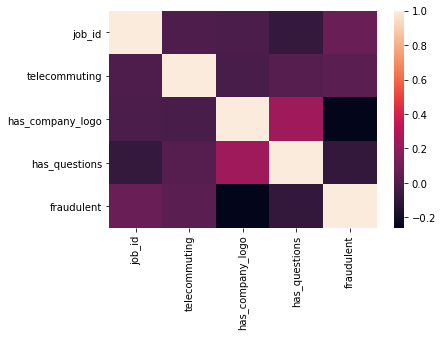

In [3]:
corr = jobdata.corr()
sb.heatmap(corr)
plt.show()

### Required experience

From the graph below, it can be seen that the majority of legitimate postings require a Mid-Senior level of experience. Whereas, the fraudulent postings are mostly for entry level jobs.

In [4]:
# Converting fraudulent column to bool
jobdata['fraudulent'] = jobdata['fraudulent'].astype(bool)

# Extracting real postings
for col in jobdata.columns:
    realpostings = jobdata.loc[jobdata[col] == False]
    
# Extracting fake postings
fakepostings = jobdata[jobdata.fraudulent]

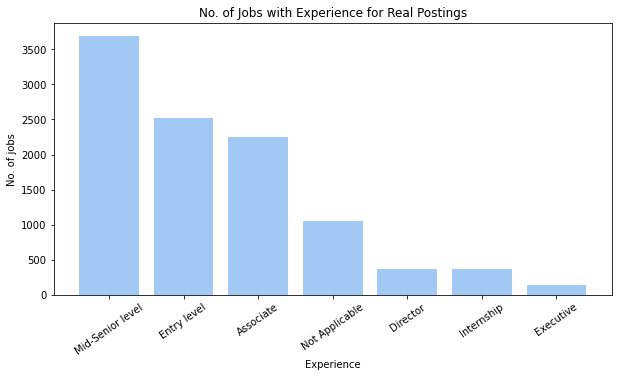

In [5]:
# Required experiences for real jobs
experience = dict(realpostings.required_experience.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience for Real Postings')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

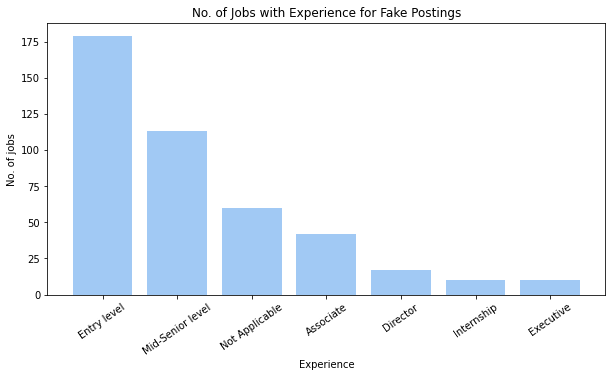

In [6]:
# Required experiences for fake jobs
experience = dict(fakepostings.required_experience.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience for Fake Postings')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

### Required education

With reference to the plots below, majority of the legitimate job postings require at least a bachelor's degree. Whereas, most fake postings only require a highschool diploma or its equivalent. 

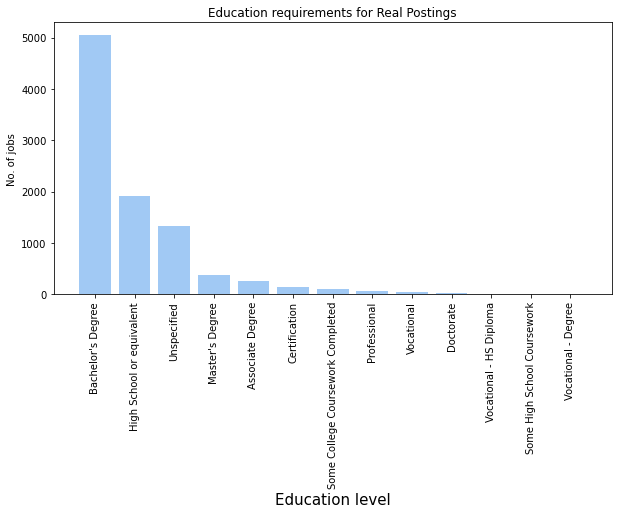

In [7]:
# Required education for real jobs

experience = dict(realpostings.required_education.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('Education requirements for Real Postings')
plt.xlabel('Education level', size=15)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=90)
plt.show()

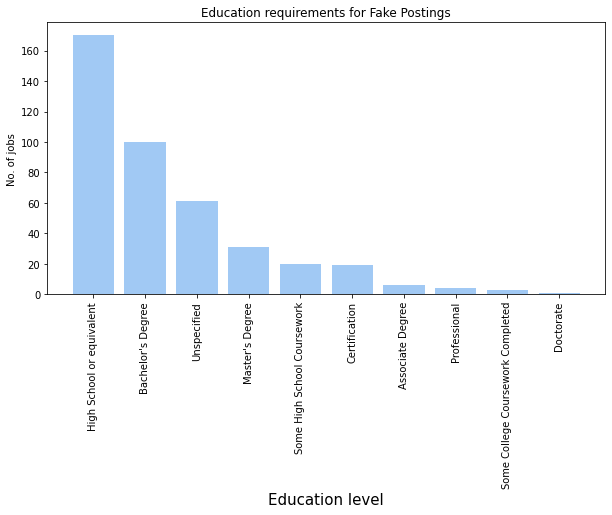

In [8]:
# Required education for fake jobs

experience = dict(fakepostings.required_education.value_counts())
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('Education requirements for Fake Postings')
plt.xlabel('Education level', size=15)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=90)
plt.show()